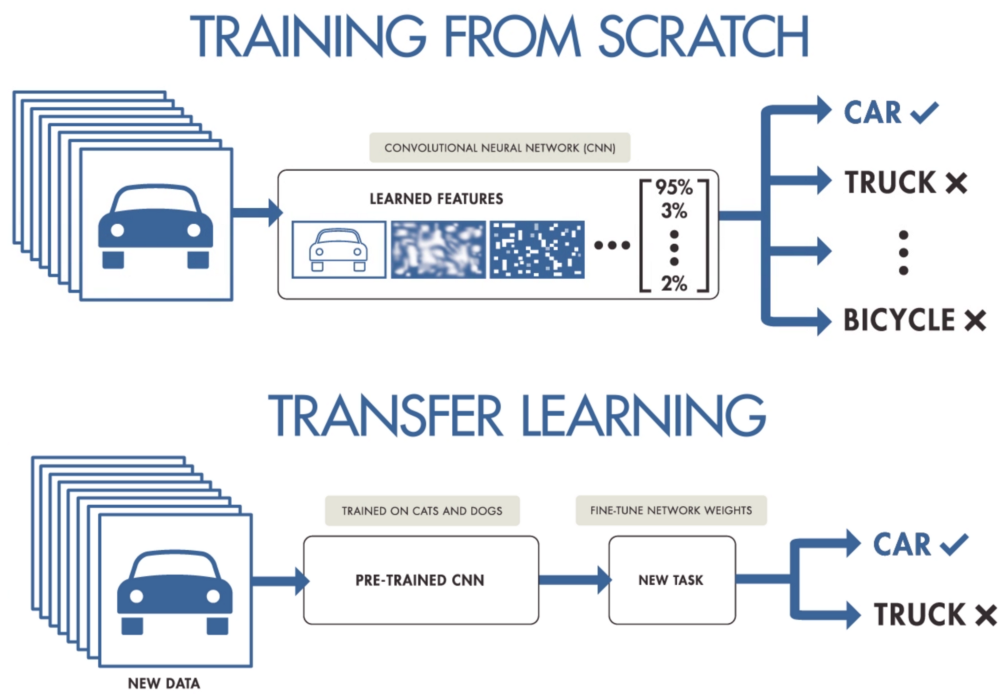

In [ ]:
import zipfile
with zipfile.ZipFile("../input/aerial-cactus-identification/train.zip","r") as z:
    z.extractall()

# Table of content

<ul style="font-size:120%;">
    <li style="font-size:120%;"><a href="https://www.kaggle.com/rahulanand0070/all-you-need-to-know-about-transfer-learning-cnn?scriptVersionId=69464942&cellId=4">1. Introduction</a></li>
    <ul>
   <li style="font-size:120%;">1.1. What is Transfer Learning? </li>
    <li style="font-size:120%;"> 1.2. Need of Transfer Learning </li>
    <li style="font-size:120%;"> 1.3. Limitations </li>
    </ul>
<li style="font-size:120%;">2. Use Pretrained Model</li>
<li style="font-size:120%;">3. Fine tuning Last layer</li>
<li style="font-size:120%;">4. Freezing some layer and Fine tuning rest of model's layer</li>
<li style="font-size:120%;">5. Use only model architecture and learn weight from scratch</li>
</ul>

# 1.Introduction

## 1.1 What is Transfer Learning?

<p style="font-size:120%;">
<i>Transfer Learning is like Standing on the shoulders of giants</i>
</p>

<p style="font-size:120%;">
In Transfer Learning we use the pretrained knowledge or weights and we tweak or fine tuning model on our dataset<br>
</p>

<p style="font-size:120%;">
Transfer Learning is a way of actually taking what work has been done and transferring that into a different domain <br>
For example-<b>Imagenet</b> contain regular images of cats ,dogs,buses and lot of everday objects.We train the model on these images and use that knowledge in malaria parasite detection or any other task<br>
</p>
<p style="font-size:120%;">
<i>Transfer Learning is quite popular in Computer vision and NLP task.In NLP we can use transformer based model Like BERT<br>
In this tutorial we will focus on computer vision</i><br>
</p>
<p style="font-size:120%;">
<b>ImageNet</b>-ImageNet is a image classification problem which contain  More than 14 million images and 1000 classes<br><br>
  </p>

## 1.2. Need of Transfer Learning?
 <p style="font-size:120%;">
1.If our dataset is really small<br>
2.Low Computation Power<br>
3.If our dataset is similar to pretrained data then we have to only fine tuning our model it would save lot of time<br>
</p>

## 1.3. Limitations

 <p style="font-size:120%;">
 1.Dataset is completely different from pretrained data
  </p>

### Data Preparation

In [ ]:
import pandas as pd
train=pd.read_csv("/kaggle/input/aerial-cactus-identification/train.csv")

In [ ]:
train.head()

In [ ]:
cd train

In [ ]:
has_cactus=train['has_cactus'].value_counts()
print(has_cactus)

In [ ]:
import tensorflow as tf
from tensorflow.keras import Sequential
from tensorflow.keras.layers import Flatten,Dense,Conv2D,MaxPooling2D,ZeroPadding2D,Dropout
from tensorflow.keras.preprocessing.image import ImageDataGenerator

In [ ]:
datagen=ImageDataGenerator(rescale=1/255,validation_split=0.30)

In [ ]:
train["has_cactus"]= train["has_cactus"].apply(str)

In [ ]:
bs = 64
train_generator = datagen.flow_from_dataframe(
    dataframe = train,
    x_col = "id",
    y_col = "has_cactus",
    subset = "training",
    batch_size = bs,
    target_size=(32,32),
    #seed = 1,
    shuffle = True,
    class_mode = "categorical")

valid_generator = datagen.flow_from_dataframe(
    dataframe = train,
    x_col = "id",
    y_col = "has_cactus",
    subset = "validation",
    target_size=(32,32),
    batch_size = bs,
    shuffle = True,
    class_mode = "categorical")

# 2.Using Pretrained Model

<p style="font-size:120%;">
In pretrained model we use imagenet weight completely without any fine tuning of model.<b>Problem</b> with this approach is that we can only classify or perform task based upon the classes in which pretrained model weights are train <br>
    imagenet 1000 classes-<a href="https://gist.github.com/yrevar/942d3a0ac09ec9e5eb3a">https://gist.github.com/yrevar/942d3a0ac09ec9e5eb3a</a>
</p>

### downloading images from wikipedia for classification
 <p style="font-size:120%;">
1.Mini Van <br>
2.Taxi <br>
3.Pug dog
</p>

In [ ]:
#mini-van
!wget https://upload.wikimedia.org/wikipedia/commons/b/b4/Bloody_Bridge_car_park%2C_May_2010_%2806%29.JPG
#Taxi
!wget https://upload.wikimedia.org/wikipedia/commons/e/ef/NYC_Taxi_Ford_Crown_Victoria.jpg
#pug dog
!wget https://upload.wikimedia.org/wikipedia/commons/f/f0/Mops_oct09_cropped2.jpg

## Important model Arguments

<p style="font-size:120%;">
1.<b>weights</b>-As we are using pretrained model here, we have set weight='imagenet' if we set weight='None' then we cannot use pretrained weight.<br><br>
2.<b>include_top</b>-whether to include the 3 fully-connected layers at the top of the network or not.As we want to do classification without training so we have to set include_top='True'.If we set include_top='False' then we have to add dense layer and output layer for pretrained model this is not required in pretrained we will see include_top='False' in Fine tuning Last layer & Freeze some layer and  Fine tuning the rest.<br><br>
3.<b>input_shape</b>-input size of images as we have set include_top='True' and weights= 'imagenet' then input_shape must be '(224,244,3)'.if weights='imagenet' and include_top='True' then we cannot train or classify on custom images shape.If you want to train on custom image size then make sure weights is not equal to 'imagenet' and include_top is not equal to 'True'.Either weight has to be None or include_top='False' <br><br>
4.As we set include_top='True' then classes='1000' and classifier_activation='softmax' <br><br>
</p>

In [ ]:
from keras.applications.vgg19 import VGG19
# load the model
model = VGG19(weights= 'imagenet',include_top=True,input_shape=(224,224,3))
model.summary()

In [ ]:
from keras.preprocessing.image import img_to_array
from keras.preprocessing.image import load_img
import numpy as np
from keras.applications.vgg16 import preprocess_input
from tensorflow.keras.applications.mobilenet import decode_predictions
def make_classification(image):
    pred = model.predict(image)
    pred_classes = decode_predictions(pred, top=5)
    for i in pred_classes[0]:
        print(i)


def preprocess(image_name):
    image = load_img(image_name, target_size=(224, 224))
    image = img_to_array(image)
    image = np.expand_dims(image, axis=0)
    image = preprocess_input(image)
    return image

In [ ]:
mini_bus='Bloody_Bridge_car_park,_May_2010_(06).JPG'
pubg_dogs='Mops_oct09_cropped2.jpg'
taxi='NYC_Taxi_Ford_Crown_Victoria.jpg'

#classifing mini_van 
print("for mini bus")
image=preprocess(mini_bus)
make_classification(image)
print("\n")
print("\n")
#classifing pubg_dogs 
print("for pubg dogs")
image=preprocess(pubg_dogs)
make_classification(image)
print("\n")
print("\n")
#classifing taxi 
print("for taxi")
image=preprocess(taxi)
make_classification(image)
print("\n")
print("\n")

# 3.Fine tuning Last layer
<p style="font-size:120%;">
In this we will use imagenet weight for all convolution layer and add output layer then we will train the last layer
</p>

## Important model Arguments
<p style="font-size:120%;">
1.<b>weights</b>-As we are fine tuning our model here we will set weight='imagenet' if we set weight='None' then we cannot use weight which is trained on imagenet.<br><br>
2.<b>include_top</b>-Whether to include the 3 fully-connected layers at the top of the network not.here we are Fine tuning our model's last layer on our custom dataset so we need to add output layer based upon number of classes in our dataset here we will set include_top='False'
<br><br>
3.<b>input_shape</b>-As we have set include_top='False' then we train on any image size for vgg19 image size should not be less than 32x32.<br><br>
4.As we have set include_top='False'so no need to pass number of classes here we will pass number classes in dense layer and same for classifier_activation<br><br>
</p>

In [ ]:
from tensorflow.keras.applications.vgg19 import VGG19

In [ ]:
model = VGG19(weights= 'imagenet',include_top=False,input_shape=(32,32,3))

## making layer trainable = False or Freezing convolution layers


<p style="font-size:120%;">
<b>Code:</b>
</p>

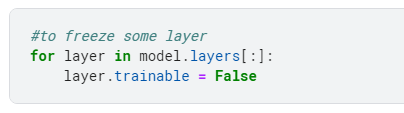

this will make every layer non trainable

In [ ]:
#to freeze some layer
for layer in model.layers[:]:
    layer.trainable = False

<p style="font-size:120%;">
Here layer_n='False' mean you don't want to train that layer you can also say we have freeze that layer <br>
when layer_n='True' mean that you want to train that layer <br>
As include_top= 'False' then we only have convolution layer and we have freeze those layer<br>
</p>

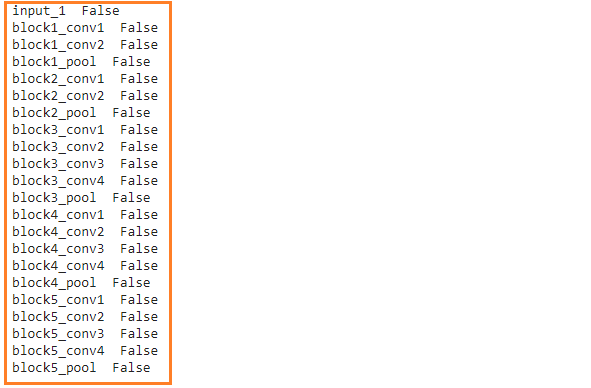

In [ ]:
for layer in model.layers:
    sp=' '[len(layer.name):]
    print(layer.name,sp,layer.trainable)

In [ ]:
from tensorflow.keras.models import Model
x = Flatten()(model.output)

prediction = Dense(2, activation='softmax')(x)

# create a model object
model = Model(inputs=model.input, outputs=prediction)

In [ ]:
model.summary()

In [ ]:
# compiling the model
model.compile(loss='categorical_crossentropy', optimizer="adam", metrics=['accuracy'])

In [ ]:
history = model.fit_generator(train_generator,
                         steps_per_epoch = len(train_generator),
                         epochs = 5,
                         validation_data = valid_generator,
                         validation_steps = len(valid_generator),
                         verbose=1)

In [ ]:
import matplotlib.pyplot as plt
def plot_learningCurve(history, epoch):
    # Plot training & validation accuracy values
    epoch_range = range(1, epoch+1)
    plt.plot(epoch_range, history.history['accuracy'])
    plt.plot(epoch_range, history.history['val_accuracy'])
    plt.title('Model accuracy')
    plt.ylabel('Accuracy')
    plt.xlabel('Epoch')
    plt.legend(['Train', 'Val'], loc='upper left')
    plt.show()

    # Plot training & validation loss values
    plt.plot(epoch_range, history.history['loss'])
    plt.plot(epoch_range, history.history['val_loss'])
    plt.title('Model loss')
    plt.ylabel('Loss')
    plt.xlabel('Epoch')
    plt.legend(['Train', 'Val'], loc='upper left')
    plt.show()

plot_learningCurve(history, 5)

# 4.Freezing some layer and Fine tuning rest of model's layer

<p style="font-size:120%;">
In this we will freeze some of layer and fine tune rest of layers.In starting layer model learn about edges and roundness. 
</p>

## Important model Arguments
<p style="font-size:120%;">
1.<b>weights</b>-As we are fine tuning our model here we will set weight='imagenet' if we set weight='None' then we cannot use weight which is trained on imagenet.<br><br>
2.<b>include_top</b>-Whether to include the 3 fully-connected layers at the top of the network not.here we are Fine tuning our model's last layer on our custom dataset so we need to add output layer based upon number of classes in our dataset here we will set include_top='False'
<br><br>
3.<b>input_shape</b>-As we have set include_top='False' then we train on any image size for vgg19 image size should not be less than 32x32.<br><br>
4.As we have set include_top='False'so no need to pass number of classes here we will pass number classes in dense layer and same for classifier_activation<br><br>
</p>

In [ ]:
from tensorflow.keras.applications.vgg19 import VGG19

In [ ]:
model = VGG19(weights= 'imagenet',include_top=False,input_shape=(32,32,3))

## making layer.trainable = False or Freeze some layers
<p style="font-size:120%;">
Here we include_top=False so we only have convolution layer and we are freezing the starting 8 layers by making making layer.trainable = 'False'<br>
<b>Code:</b>
</p>    

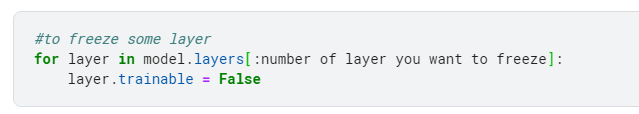


In [ ]:
#to freeze some layer
for layer in model.layers[:8]:
    layer.trainable = False

<p style="font-size:120%;">
Here layer_n='False' mean you don't want to train that layer you can also say we have freeze that layer <br>
when layer_n='True' mean that you want to train that layer <br>
As include_top= 'False' then we only have convolution layer and we have freeze starting 8 layer<br>
</p>

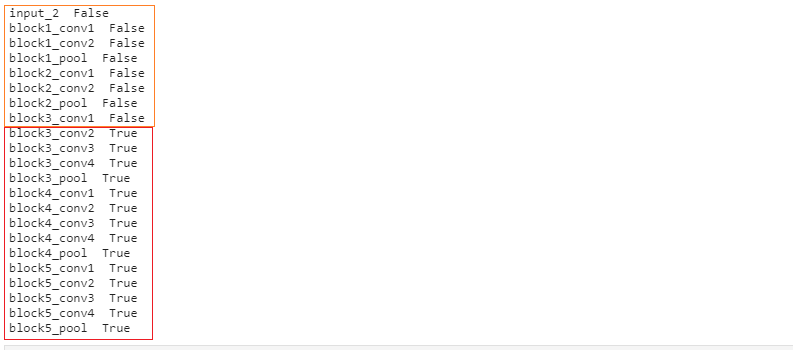

In [ ]:
for layer in model.layers:
    sp=' '[len(layer.name):]
    print(layer.name,sp,layer.trainable)

In [ ]:

from tensorflow.keras.models import Model
x = Flatten()(model.output)

prediction = Dense(2, activation='softmax')(x)

# create a model object
model = Model(inputs=model.input, outputs=prediction)

In [ ]:
model.summary()

In [ ]:
# compiling the model
model.compile(loss='categorical_crossentropy', optimizer="adam", metrics=['accuracy'])

In [ ]:
history = model.fit_generator(train_generator,
                         steps_per_epoch = len(train_generator),
                         epochs = 5,
                         validation_data = valid_generator,
                         validation_steps = len(valid_generator),
                         verbose=1)

In [ ]:
import matplotlib.pyplot as plt
def plot_learningCurve(history, epoch):
    # Plot training & validation accuracy values
    epoch_range = range(1, epoch+1)
    plt.plot(epoch_range, history.history['accuracy'])
    plt.plot(epoch_range, history.history['val_accuracy'])
    plt.title('Model accuracy')
    plt.ylabel('Accuracy')
    plt.xlabel('Epoch')
    plt.legend(['Train', 'Val'], loc='upper left')
    plt.show()

    # Plot training & validation loss values
    plt.plot(epoch_range, history.history['loss'])
    plt.plot(epoch_range, history.history['val_loss'])
    plt.title('Model loss')
    plt.ylabel('Loss')
    plt.xlabel('Epoch')
    plt.legend(['Train', 'Val'], loc='upper left')
    plt.show()

plot_learningCurve(history, 5)

# 5. Use only model architecture and training from Scratch

## Important model Arguments

<p style="font-size:120%;">
1.<b>weights</b>-As we are training our model from scratch so we will set weights='None'.<br><br>
2.<b>include_top</b>-Whether to include the 3 fully-connected layers at the top of the network or not.
here we have set include_top=True it will add fully-connected layers.if you want you can set include_top=False then you have define output layer and dense layer
<br><br>
3.<b>input_shape</b>-Input size of images as we set include_top='False' or weights= 'None' then we train on any image size for vgg19 image size should not be less than 32x32.<br><br>
4.<b>classes</b>=2<br><br>
4.<b>classifier_activation</b>=softmax<br><br>
</p>


In [ ]:
from tensorflow.keras.applications.vgg19 import VGG19

In [ ]:
model = VGG19(weights= None,include_top=True,input_shape=(32,32,3),classes=2,classifier_activation="softmax")

In [ ]:
for layer in model.layers:
    sp=' '[len(layer.name):]
    print(layer.name,sp,layer.trainable)

In [ ]:
model.summary()

In [ ]:
# compiling the model
model.compile(loss='categorical_crossentropy', optimizer="adam", metrics=['accuracy'])

In [ ]:
history = model.fit_generator(train_generator,
                         steps_per_epoch = len(train_generator),
                         epochs = 5,
                         validation_data = valid_generator,
                         validation_steps = len(valid_generator),
                         verbose=1)

In [ ]:
import matplotlib.pyplot as plt
def plot_learningCurve(history, epoch):
    # Plot training & validation accuracy values
    epoch_range = range(1, epoch+1)
    plt.plot(epoch_range, history.history['accuracy'])
    plt.plot(epoch_range, history.history['val_accuracy'])
    plt.title('Model accuracy')
    plt.ylabel('Accuracy')
    plt.xlabel('Epoch')
    plt.legend(['Train', 'Val'], loc='upper left')
    plt.show()

    # Plot training & validation loss values
    plt.plot(epoch_range, history.history['loss'])
    plt.plot(epoch_range, history.history['val_loss'])
    plt.title('Model loss')
    plt.ylabel('Loss')
    plt.xlabel('Epoch')
    plt.legend(['Train', 'Val'], loc='upper left')
    plt.show()

plot_learningCurve(history, 5)

# End Notes
<p style="font-size:120%;">
<b>1.</b>In this notebook we have use VGG19 but you can use any model procedure is same for very model <a href="https://keras.io/api/applications/">https://keras.io/api/applications/</a><br>
<b>2.input_shape</b>-input size of images as we set include_top='True' and weights= 'imagenet' and then input_shape must be '(224,244,3)'.if weights= 'imagenet' and include_top='True' then we cannot train custom images shape.If you want to train on custom image size then make sure weights is not equal to 'imagenet' and include_top is not equal to 'True'.weight has to be None or include_top='False<br> 
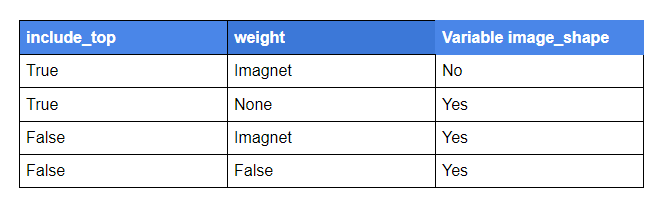
<b>3.</b>If layer_n='False' mean you don't want to train that layer you can also say we have freeze these layers <br>
when layer_n='True' mean you we want the train that layer <br>
    <b>Code:</b>

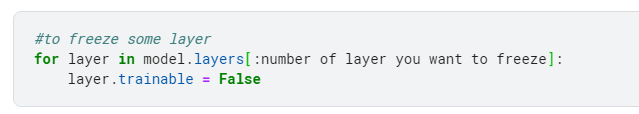
</p>
After making some freezing some layer and making some layer trainable

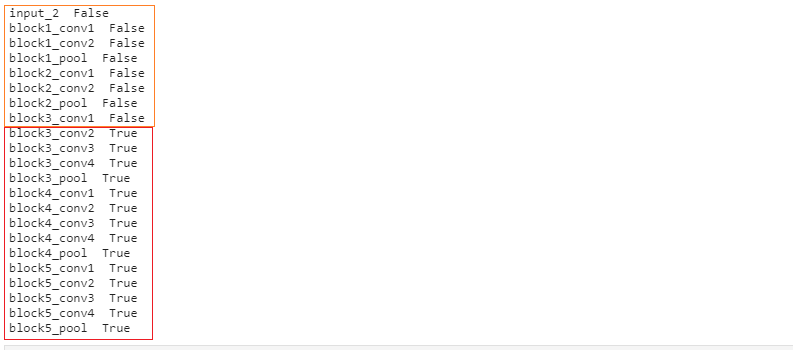
